In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from numpy import linalg as lng
from PIL import Image

In [3]:
# Description: Bovine TB (Mycrobacterium bovis) for the UK
# Source: UK Health Protection Agency - Public Health England 
# https://webarchive.nationalarchives.gov.uk/ukgwa/20140714110831/http://www.hpa.org.uk/Topics/InfectiousDiseases/InfectionsAZ/Tuberculosis/TBUKSurveillanceData/EnhancedMycobacteriumBovisSurveillance/
# Bovine TB cases in human by year
# Ref. Robert J. Knell - Introductory R

df = pd.DataFrame({'year':[1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011],'mbovis':[18,18,20,12,17,16,23,28,22,21,24,30,31]})

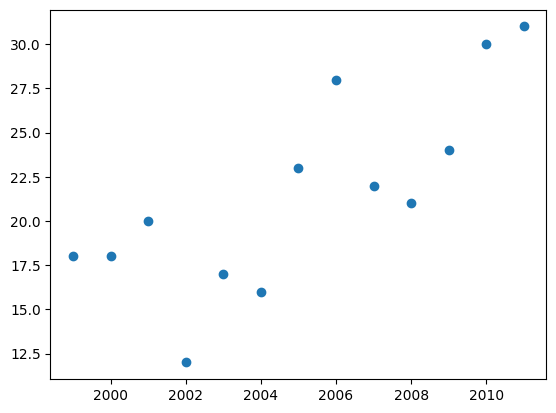

In [4]:
plt.scatter(df['year'],df['mbovis'])
plt.show()

In [5]:
X = df[['year']].to_numpy()
y = df['mbovis'].to_numpy()

In [6]:
X_mat = np.append(np.ones((13,1),dtype=np.int8),X,axis=1)
X_mat


array([[   1, 1999],
       [   1, 2000],
       [   1, 2001],
       [   1, 2002],
       [   1, 2003],
       [   1, 2004],
       [   1, 2005],
       [   1, 2006],
       [   1, 2007],
       [   1, 2008],
       [   1, 2009],
       [   1, 2010],
       [   1, 2011]])

$$ \beta = (X^{\mathsf{T}}X)^{-1}X^{\mathsf{T}}y$$

In [7]:
beta = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
beta

array([-2.21480769e+03,  1.11538462e+00])

In [8]:
model = LinearRegression()
model.fit(X,y)
print(f'Beta0: {model.intercept_}, Beta1: {model.coef_[0]}')

Beta0: -2214.8076923076924, Beta1: 1.1153846153846154


### Convolution

It is defined as the integral of the product of the two functions after one is reflected about the y-axis and shifted
$$(f * g)(t) := \int_{-\infty}^\infty f(\tau) g(t - \tau) \, d\tau$$

For discrete values we have:
$$G= f*g := G[i,j] = \sum_{u=k}^{k}\sum_{v=-k}^{k}f[u,v]g[i+u,j+v]$$

In [9]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

def grayConversion(image):
    grayValue = 0.07 * image[:,:,2] + 0.72 * image[:,:,1] + 0.21 * image[:,:,0]
    gray_img = grayValue.astype(np.uint8)
    return gray_img

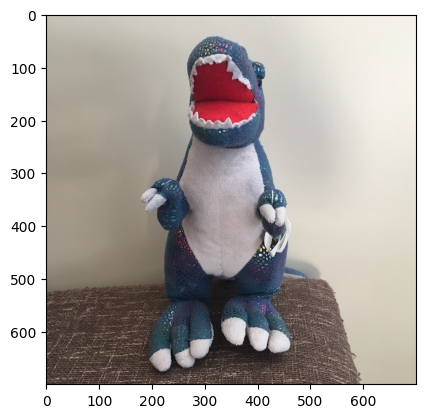

In [10]:
my_image = Image.open('../data/raw/dinosaur.jpg')
my_image_np = np.asarray(my_image)
plt.imshow(my_image_np)
plt.show()

In [16]:
my_image_np.shape

(700, 700, 3)

In [11]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

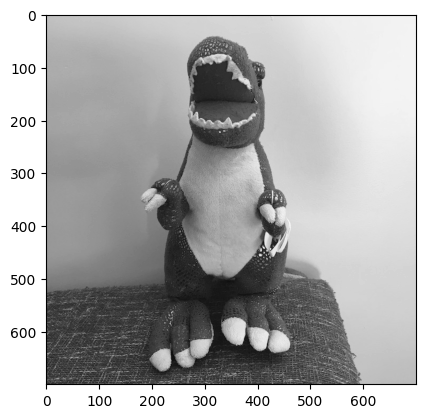

In [12]:
my_gray_image =grayConversion(my_image_np)
plt.imshow(my_gray_image, cmap='gray')
plt.show()

In [14]:
my_gray_image.shape

(700, 700)

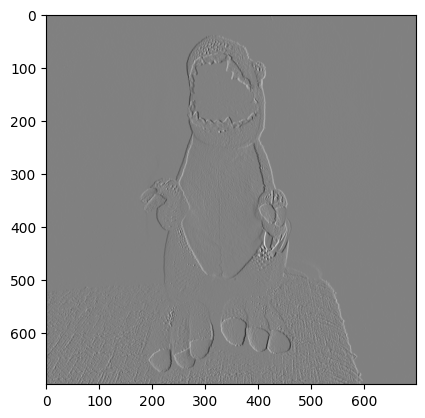

In [17]:
my_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
my_result = convolution2d(my_gray_image, my_kernel)
plt.imshow(my_result, cmap='gray')
plt.show()

In [ ]:
my_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
my_result = convolution2d(my_gray_image, my_kernel)
plt.imshow(my_result, cmap='gray')
plt.show()

### 2. Images, manipulation and processing

An image (from Latin: imago) is an artifact, such as a photograph or other two-dimensional picture, that resembles a subject—usually a physical object—and thus provides a depiction of it. In the context of signal processing, an image is a distributed amplitude of color(s)[1]. In a computer, images are translated to matrices, with colors represented by channels. If we only have one channel the image could be a gray colored one, and three channels repres
https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [20]:
import cv2

In [25]:
dino = cv2.imread('../data/raw/dinosaur.jpg')
dino.shape

(700, 700, 3)

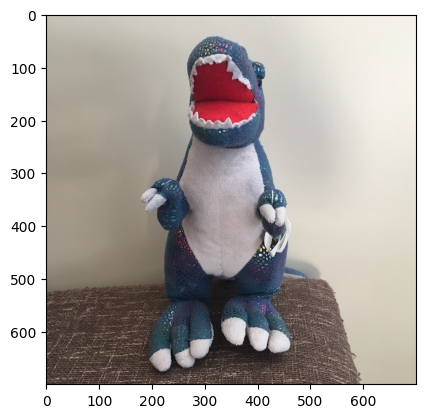

In [29]:
plt.imshow(cv2.cvtColor(dino,cv2.COLOR_BGR2RGB))
plt.show()

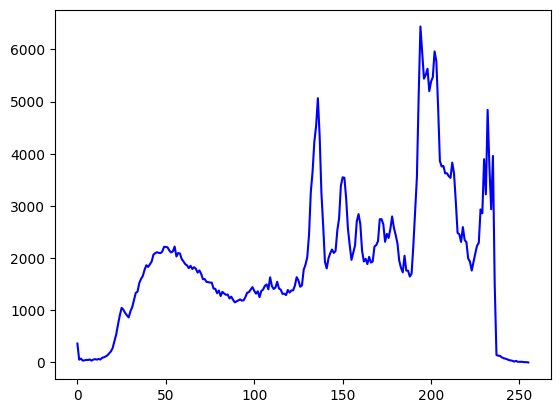

In [32]:
# Let's see the color histogram
blue_data = cv2.calcHist([dino], [0], None, [256], [0,255])
# green_data = cv2.calcHist([dino], [1], None, [256], [0,255])
# red_data = cv2.calcHist([dino], [2], None, [256], [0,255])
plt.plot(blue_data,color='b')
plt.show()

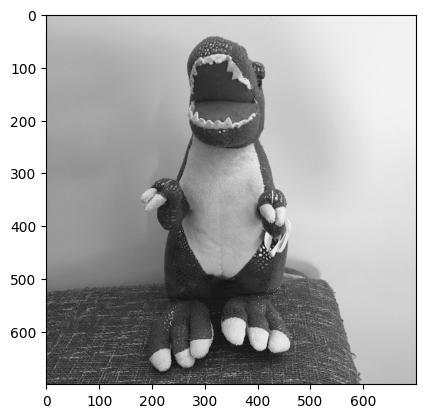

In [33]:
# Let's convert our dinosaur to gray
dino_gray = cv2.cvtColor(dino, cv2.COLOR_BGR2GRAY)
plt.imshow(dino_gray, cmap='gray')
plt.show()

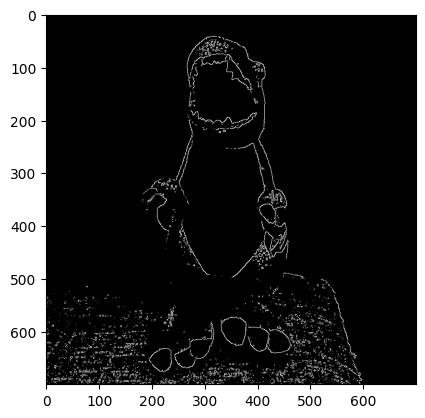

In [46]:
# Find edges using Canny algorithm
dino_edges = cv2.Canny(dino_gray, 300, 300)
plt.imshow(dino_edges, cmap='gray')
plt.show()

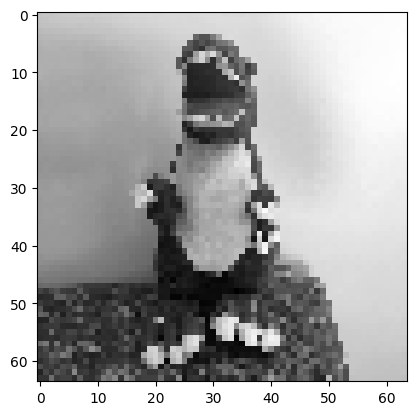

In [47]:
dino_resized = cv2.resize(dino_gray, dsize=(64,64))
plt.imshow(dino_resized, cmap='gray')
plt.show()

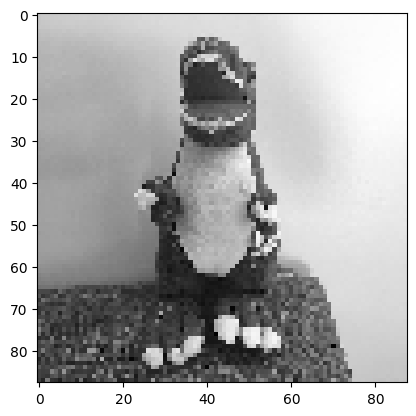

In [48]:
# Let's sample just some columns
plt.imshow(dino_gray[::8,::8], cmap='gray')
plt.show()

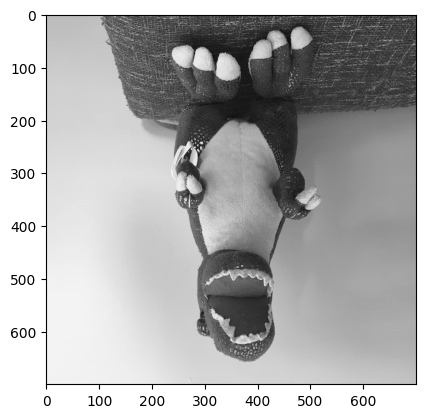

In [49]:
# Or just invert the image. As you'll see, slicing is our friend
plt.imshow(dino_gray[::-1,::-1], cmap='gray')
plt.show()